# Step 1: Install And Import Python Libraries

The first step is to install and import Python libraries.
We need to install the `vaderSentiment` package for VADER and the`flair` package for flair.

In [24]:
# Install vaderSentiment package for VADER
!pip install vaderSentiment

In [ ]:
# Install flair
!pip install flair

After installing the packages, let's import the Python libraries. We need to import `pandas` and `numpy` for data processing.

For the sentiment analysis, we need to import `TextBlob`, `SentimentIntensityAnalyzer` from `vaderSentiment`, and `TextClassifier` from `flair`. We also need to load the English sentiment data from `TextClassifier` and import `Sentence` for text processing for the flair pre-trained model.

To check the sentiment prediction accuracy, we need to import `accuracy_score` from `sklearn`.

Last but not least, we set the `pandas` dataframe column width to be 1000, which will allow us to see more content from the review.

In [26]:
# Import the necessary libraries/packages
# Data processing
import pandas as pd
import numpy as np

# Import TextBlob
from textblob import TextBlob

# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import flair pre-trained sentiment model
from flair.models import TextClassifier
classifier = TextClassifier.load('en-sentiment')

# Import flair Sentence to process input text
from flair.data import Sentence

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set a wider colwith
pd.set_option('display.max_colwidth', 1000)

# Step 2: Download And Read Data

The second step is to download and read in the dataset.

The UCI Machine Learning Repository has the review data from three websites: imdb.com, amazon.com, and yelp.com. We will use the review data from amazon.com for this tutorial. Please follow these steps to download the data.
1. Go to: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences
2. Click "Data Folder"
3. Download "sentiment labeled sentences.zip"
4. Unzip "sentiment labeled sentences.zip"
5. Copy the file "amazon_cells_labelled.txt" to your project folder


Those who are using Google Colab for this analysis need to mount Google Drive to read the dataset. You can ignore the code below if you are not using Google Colab.

In [27]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory
import os
os.chdir("/content/drive/MyDrive/GRETA/NLP Week 6 - Sentiment Analysis")

# Print out the current directory
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GRETA/NLP Week 6 - Sentiment Analysis


Now let's read the data into a `pandas` dataframe and see what the dataset looks like.

In [29]:
# Read in data
amz_review = pd.read_csv('datasets/amazon_cells_labelled.txt', sep='\t', names=['review', 'label'])

# Take a look at the data
amz_review.head()

,review,label
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [30]:
# Get the dataset information
amz_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


`.info` helps us to get the information about the dataset.

From the output, we can see that this data set has two columns, 1000 records, and no missing data. The 'review' column is `object` type, and the 'label'column is `int64` type.

Next, let's check the distribution of the label. There are 500 positive and 500 negative reviews in the dataset, so we have a balanced dataset. For a balanced dataset, we can use accuracy as the performance metric.

In [31]:
# Check the label distribution
amz_review['label'].value_counts()

0    500
1    500
Name: label, dtype: int64

# What is TextBlob?

TextBlob is a Python library for Natural Language Processing (NLP). Sentiment analysis is one of many NLP tasks that TextBlob supports.


TextBlob offers two primary methods for sentiment analysis: the Pattern Analyzer and the Naive Bayes Analyzer. Each method uses a different approach to analyze the sentiment of text.

* **Pattern Analyzer:** This is the default analyzer in TextBlob. It's based on the pattern library and uses a lexicon (a list of known words with their associated sentiment scores). The sentiment score is a tuple representing polarity and subjectivity.

> The sentiment property in TextBlob by default using the Pattern Anlyzer. It returns a polarity score and a subjectivity score for the input text.
> * The polarity score ranges from -1 to 1, where -1 means extremely negative, and 1 means highly positive. A score near 0 means neutral sentiment.
> * The subjectivity score ranges from 0 to 1, where 0 means extremely objective and 1 means highly subjective.


* **Naive Bayes Analyzer:** This uses a Naive Bayes classifier trained on a dataset of movie reviews. It's more context-aware compared to the lexicon-based Pattern Analyzer. This analyzer classifies text into either 'pos' or 'neg' categories, providing a probabilistic sentiment classification.

In [32]:
!python -m textblob.download_corpora
# to executes the TextBlob module's script to download necessary data,
# including datasets and corpora used for tasks like part-of-speech tagging, noun phrase extraction, and sentiment analysis.

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [33]:
from textblob.sentiments import NaiveBayesAnalyzer

# Example text
text = "I love this product, it's absolutely wonderful!"

# Using Pattern Analyzer
blob_pattern = TextBlob(text)
print("Pattern Analyzer Sentiment:")
print("Polarity:", blob_pattern.sentiment.polarity)
print("Subjectivity:", blob_pattern.sentiment.subjectivity)

# Using Naive Bayes Analyzer
blob_naivebayes = TextBlob(text, analyzer=NaiveBayesAnalyzer())
print("\nNaive Bayes Analyzer Sentiment:")
print("Classification:", blob_naivebayes.sentiment.classification)
print("Positive Probability:", blob_naivebayes.sentiment.p_pos)
print("Negative Probability:", blob_naivebayes.sentiment.p_neg)

Pattern Analyzer Sentiment:
Polarity: 0.75
Subjectivity: 0.8

Naive Bayes Analyzer Sentiment:
Classification: pos
Positive Probability: 0.6560203571571461
Negative Probability: 0.34397964284285404


Let's take a peek on the TextBlob's Lexicon in Pattern Analyzer method.

In [34]:
# List of words to check
words = ["happy", "sad", "neutral", "exciting", "frustrating","crazy","yummy", ":D", "}:("]

# Checking the sentiment of each word
for word in words:
    blob = TextBlob(word)
    print(f"Word: {word}, Sentiment: {blob.sentiment}")


Word: happy, Sentiment: Sentiment(polarity=0.8, subjectivity=1.0)
Word: sad, Sentiment: Sentiment(polarity=-0.5, subjectivity=1.0)
Word: neutral, Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Word: exciting, Sentiment: Sentiment(polarity=0.3, subjectivity=0.8)
Word: frustrating, Sentiment: Sentiment(polarity=-0.4, subjectivity=0.9)
Word: crazy, Sentiment: Sentiment(polarity=-0.6, subjectivity=0.9)
Word: yummy, Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Word: :D, Sentiment: Sentiment(polarity=1.0, subjectivity=1.0)
Word: }:(, Sentiment: Sentiment(polarity=-0.75, subjectivity=1.0)


In [35]:
# Example text
text = 'It is an interesting movie.'

# TextBlob sentiment
textBlob_sentiment = TextBlob(text).sentiment
textBlob_sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

In [36]:
# Example text
text = 'It is a very interesting movie.'

# TextBlob sentiment
textBlob_sentiment = TextBlob(text).sentiment
textBlob_sentiment

Sentiment(polarity=0.65, subjectivity=0.65)

In this example, the sample text has a polarity score of 0.65 and the subjectivity score of 0.65, which means TextBlob interprets the sentence to have a subjective positive sentiment.

We can use `.polarity` to extract the sentiment score.

In [37]:
# Extract sentiment score
textBlob_sentiment.polarity

0.65

Let's test using other examples

In [38]:
text2 = "This movie is not interesting."

# TextBlob sentiment
textBlob_sentiment2 = TextBlob(text2).sentiment
textBlob_sentiment2

Sentiment(polarity=-0.25, subjectivity=0.5)

In [16]:
# Extract sentiment score
textBlob_sentiment2.polarity

-0.25

In [39]:
# TextBlob sentiment using Naive Bayes Analyzer
blob_naivebayes = TextBlob(text2, analyzer=NaiveBayesAnalyzer())
print("Classification:", blob_naivebayes.sentiment.classification)
print("Positive Probability:", blob_naivebayes.sentiment.p_pos)
print("Negative Probability:", blob_naivebayes.sentiment.p_neg)

Classification: neg
Positive Probability: 0.4540202655486483
Negative Probability: 0.5459797344513515


In [40]:
text3 = "I cannot say that this movie is interesting."

# TextBlob sentiment
textBlob_sentiment3 = TextBlob(text3).sentiment
textBlob_sentiment3

Sentiment(polarity=0.5, subjectivity=0.5)

In [41]:
# Extract sentiment score
textBlob_sentiment2.polarity

-0.25

In [42]:
# TextBlob sentiment using Naive Bayes Analyzer
blob_naivebayes = TextBlob(text3, analyzer=NaiveBayesAnalyzer())
print("Classification:", blob_naivebayes.sentiment.classification)
print("Positive Probability:", blob_naivebayes.sentiment.p_pos)
print("Negative Probability:", blob_naivebayes.sentiment.p_neg)

Classification: neg
Positive Probability: 0.4468402964070675
Negative Probability: 0.5531597035929323


# What is VADER?

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a Python library focusing on social media sentiments. It has a built-in algorithm to change sentiment intensity based on punctuations, slang, emojis, and acronyms.

The output of VADER includes four scores: compound score, negative score, neutral score, and positive score.

* The pos, neu, and neg represent the percentage of tokens that fall into each category, so they add up together to be 100%.
* The compound score is a single score to measure the sentiment of the text. Similar to TextBlob, it ranges from -1 (extremely negative) to 1 (extremely positive). The scores near 0 represent the neural sentiment score.
* The compound score is not a simple aggregation of the pos, neu, and neg scores. Instead, it incorporates rule-based enhancements such as punctuation amplifiers.

In [43]:
# Take a peek on VADER's lexicon
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Import the SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Accessing the lexicon (a dictionary of words and their sentiment scores)
vader_lexicon = sid.lexicon

# Displaying a portion of the lexicon
for word in list(vader_lexicon.keys())[-30:]:  # Display last 30 words for brevity
    print(f"{word}: {vader_lexicon[word]}")


wrong: -2.1
wronged: -1.9
yay: 2.4
yeah: 1.2
yearning: 0.5
yeees: 1.7
yep: 1.2
yes: 1.7
youthful: 1.3
yucky: -1.8
yummy: 2.4
zealot: -1.9
zealots: -0.8
zealous: 0.5
{:: 1.8
|-0: -1.2
|-:: -0.8
|-:>: -1.6
|-o: -1.2
|:: -0.5
|;-): 2.2
|=: -0.4
|^:: -1.1
|o:: -0.9
||-:: -2.3
}:: -2.1
}:(: -2.0
}:): 0.4
}:-(: -2.1
}:-): 0.3


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [44]:
# Example text
text = 'It is an interesting movie.'

# VADER Sentiment
vader = SentimentIntensityAnalyzer()
vader_sentiment = vader.polarity_scores(text)
vader_sentiment

{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}

In [45]:
# Extract sentiment score
vader_sentiment['compound']

0.4019

In [46]:
# Example text
text = 'It is a very interesting movie.'

# VADER Sentiment
vader = SentimentIntensityAnalyzer()
vader_sentiment = vader.polarity_scores(text)
vader_sentiment

{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.4576}

VADER gave the sample text compound score of 0.46. There is no negative word in the sentence, so the neg score value is 0. There are 63% of neutral words and 37.4% of positive words in the sentence.

The output of VADER is saved as a dictionary. We can extract the compound sentiment score by the key 'compound'.

In [47]:
# Extract sentiment score
vader_sentiment['compound']

0.4576

Let's test using other examples

In [48]:
text2 = "This movie is not interesting."
vader_sentiment2 = vader.polarity_scores(text2)
vader_sentiment2

{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.3089}

In [49]:
# Extract sentiment score
vader_sentiment2['compound']

-0.3089

In [50]:
text3 = "I cannot say that this movie is interesting."
vader_sentiment3 = vader.polarity_scores(text3)
vader_sentiment3

{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}

# What is Flair

Flair is a state-of-art NLP framework built on PyTorch. It incorporates recent researches and provides an easy way to combine different embeddings to various NLP tasks. The pre-trained sentiment model offers a tool for sentiment analysis without training a customized model.

Unlike TextBlob and VADER that output a sentiment score between -1 and 1, flair sentiment output the predicted label with a confidence score. The confidence score ranges from 0 to 1, with 1 being very confident and 0 being very unconfident.

Before predicting the sentiment of a text, the input text needs to be tokenized by `Sentence()`. After that, we can see the sample text was split into nine tokens.

In [51]:
# Example text
text = 'It is an interesting movie.'

# Flair tokenization
sentence = Sentence(text)
sentence

Sentence[6]: "It is an interesting movie."

Next, we use `.predict` to predict the sentiment.

In [52]:
# Flair sentiment prediction
classifier.predict(sentence)
sentence

Sentence[6]: "It is an interesting movie." → POSITIVE (0.9853)

In [53]:
# Example text
text = 'It is a very interesting movie.'

# Flair tokenization
sentence = Sentence(text)
sentence

Sentence[7]: "It is a very interesting movie."

In [54]:
# Flair sentiment prediction
classifier.predict(sentence)
sentence

Sentence[7]: "It is a very interesting movie." → POSITIVE (0.9958)

The sample text has the predicted sentiment of POSITIVE and the confidence score of 0.9958. Since 0.9958 is close to 1, flair is very confident about the predictions.

The predicted label is saved as value and the prediction confidence is saved as score. We can use `sentence.labels[0].value` and `sentence.labels[0].score` separately to extract the values.

In [55]:
# Extract sentiment prediction score
print(f'Flair classified the review as {sentence.labels[0].value} with the score of {sentence.labels[0].score:.2f}')

Flair classified the review as POSITIVE with the score of 1.00


Let's test using other examples

In [56]:
# Example text
text2 = 'This movie is not interesting.'

# Flair tokenization
sentence2 = Sentence(text2)
sentence2

Sentence[6]: "This movie is not interesting."

In [57]:
# Flair sentiment prediction
classifier.predict(sentence2)
sentence2

Sentence[6]: "This movie is not interesting." → NEGATIVE (0.9999)

In [58]:
# Extract sentiment prediction score
print(f'Flair classified the review as {sentence2.labels[0].value} with the score of {sentence2.labels[0].score:.2f}')

Flair classified the review as NEGATIVE with the score of 1.00


In [59]:
# Example text
text3 = 'I cannot say that this movie is interesting.'

# Flair tokenization
sentence3 = Sentence(text3)
sentence3

Sentence[9]: "I cannot say that this movie is interesting."

In [60]:
# Flair sentiment prediction
classifier.predict(sentence3)
sentence3

Sentence[9]: "I cannot say that this movie is interesting." → POSITIVE (0.7052)

In [61]:
# Extract sentiment prediction score
print(f'Flair classified the review as {sentence3.labels[0].value} with the score of {sentence3.labels[0].score:.2f}')

Flair classified the review as POSITIVE with the score of 0.71


# How To Use TextBlob For Sentiment Analysis

We will apply TextBlob to the Amazon review dataset and see how it performs.

We first get the sentiment polarity for each review and save the values into a column called 'scores_TextBlob'. Then check if the polarity score is positive. If the score is greater than or equal to zero, the predicted sentiment for the review is positive (labeled as 1). Otherwise, the predicted sentiment for the review is negative (labeled as 0).

In [62]:
# Get sentiment score for each review
amz_review['scores_TextBlob'] = amz_review['review'].apply(lambda s: TextBlob(s).sentiment.polarity)

# Predict sentiment label for each review
amz_review['pred_TextBlob'] = amz_review['scores_TextBlob'].apply(lambda x: 1 if x >=0 else 0)
amz_review.head()

,review,label,scores_TextBlob,pred_TextBlob
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,0.000000,1
1,"Good case, Excellent value.",1,0.850000,1
2,Great for the jawbone.,1,0.800000,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,0.390625,1
4,The mic is great.,1,0.800000,1


After getting predictions from TextBlob, let's check the prediction accuracy.

In [63]:
# Compare Actual and Predicted and get the Accuracy, Precision, Recall, and F1 score
actual_labels = amz_review['label']
predicted_labels = amz_review['pred_TextBlob']

accuracy_TextBlob = accuracy_score(actual_labels,predicted_labels)
precision_TextBlob = precision_score(actual_labels, predicted_labels, average='macro')  # Use 'micro' or 'weighted' if more appropriate
recall_TextBlob = recall_score(actual_labels, predicted_labels, average='macro')
f1_TextBlob = f1_score(actual_labels, predicted_labels, average='macro')

print(f'Accuracy:', accuracy_TextBlob)
print(f'Precision:', precision_TextBlob)
print(f'Recall:', recall_TextBlob)
print(f'F1:', f1_TextBlob)

Accuracy: 0.688
Precision: 0.7738927738927739
Recall: 0.688
F1: 0.6614583333333333


Comparing the actual label with the TextBlob prediction, we get an accuracy score of 0.688, which means that TextBlob predicted the review sentiment 68.8% of the time.

## Use Naive Bayes classifier

In [ ]:
# Function to apply Naive Bayes Sentiment Analysis
def naive_bayes_sentiment(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    return blob.sentiment.classification

# Applying the Naive Bayes classifier to get sentiment
amz_review['naive_bayes_analysis'] = amz_review['review'].apply(naive_bayes_sentiment)

# Predict sentiment label (1 for positive, 0 for negative)
amz_review['pred_TextBlob_NaiveBayes'] = amz_review['naive_bayes_analysis'].apply(lambda x: 1 if x.classification == 'pos' else 0)
amz_review.head()

In [ ]:
# Compare Actual and Predicted and get the Accuracy, Precision, Recall, and F1 score
actual_labels = amz_review['label']
predicted_labels = amz_review['pred_TextBlob_NaiveBayes']

accuracy_TextBlob_NB = accuracy_score(actual_labels,predicted_labels)
precision_TextBlob_NB = precision_score(actual_labels, predicted_labels, average='macro')  # Use 'micro' or 'weighted' if more appropriate
recall_TextBlob_NB = recall_score(actual_labels, predicted_labels, average='macro')
f1_TextBlob_NB = f1_score(actual_labels, predicted_labels, average='macro')

print(f'Accuracy:', accuracy_TextBlob_NB)
print(f'Precision:', precision_TextBlob_NB)
print(f'Recall:', recall_TextBlob_NB)
print(f'F1:', f1_TextBlob_NB)

# How To Use VADER For Sentiment Analysis

We will apply VADER to the Amazon review dataset and see how it performs.

We first get the sentiment compound score for each review and save the values into a column called 'scores_VADER'. Then check if the compound score is positive. If the score is greater than or equal to zero, the predicted sentiment for the review is positive (labeled as 1). Otherwise, the predicted sentiment for the review is negative (labeled as 0).

In [64]:
# Get sentiment score for each review
vader_sentiment = SentimentIntensityAnalyzer()
amz_review['scores_VADER'] = amz_review['review'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound'])

# Predict sentiment label for each review
amz_review['pred_VADER'] = amz_review['scores_VADER'].apply(lambda x: 1 if x >=0 else 0)
amz_review.head()

,review,label,scores_TextBlob,pred_TextBlob,scores_VADER,pred_VADER
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,0.000000,1,-0.3535,0
1,"Good case, Excellent value.",1,0.850000,1,0.8402,1
2,Great for the jawbone.,1,0.800000,1,0.6249,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,0.390625,1,-0.6145,0
4,The mic is great.,1,0.800000,1,0.6249,1


After getting predictions from VADER, let's check the prediction accuracy.

In [65]:
# Compare Actual and Predicted and get the Accuracy, Precision, Recall, and F1 score
actual_labels = amz_review['label']
predicted_labels = amz_review['pred_VADER']

accuracy_VADER = accuracy_score(actual_labels,predicted_labels)
precision_VADER = precision_score(actual_labels, predicted_labels, average='macro')  # Use 'micro' or 'weighted' if more appropriate
recall_VADER = recall_score(actual_labels, predicted_labels, average='macro')
f1_VADER = f1_score(actual_labels, predicted_labels, average='macro')

print(f'Accuracy:', accuracy_VADER)
print(f'Precision:', precision_VADER)
print(f'Recall:', recall_VADER)
print(f'F1:', f1_VADER)

Accuracy: 0.758
Precision: 0.815860609978257
Recall: 0.758
F1: 0.746385468935364


Comparing the actual label with the VADER prediction, we get an accuracy score of 0.768, which means that VADER predicted the review sentiment 76.8% of the time.

TextBlob has a prediction accuracy of 68.8% for the same dataset, so VADER has an 8% improvement over the TextBlob prediction.

# How To Use Flair For Sentiment Analysis

We will apply the flair pre-trained sentiment model to predict the sentiment of the Amazon reviews.

Firstly, let's define a function that takes a review as input and the predicted label and confidence as outputs.

In [67]:
# Define a function to get Flair sentiment prediction score
def score_flair(text):
  sentence = Sentence(text)
  classifier.predict(sentence)
  score = sentence.labels[0].score
  value = sentence.labels[0].value
  return score, value

Then apply the function to each review in the dataset.

In [68]:
# Get sentiment score for each review
amz_review['scores_flair'] = amz_review['review'].apply(lambda s: score_flair(s)[0])

# Predict sentiment label for each review
amz_review['pred_flair'] = amz_review['review'].apply(lambda s: score_flair(s)[1])

In [ ]:
amz_review.head()

,review,label,scores_TextBlob,pred_TextBlob,scores_VADER,pred_VADER,scores_flair,pred_flair
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,0.000000,1,-0.3535,0,0.998717,0
1,"Good case, Excellent value.",1,0.850000,1,0.8402,1,0.998424,1
2,Great for the jawbone.,1,0.800000,1,0.6249,1,0.995642,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,0.390625,1,-0.6145,0,0.999925,0
4,The mic is great.,1,0.800000,1,0.6249,1,0.979156,1


In [ ]:
# Check the distribution of the score
amz_review['scores_flair'].describe()

count    1000.000000
mean        0.988019
std         0.046841
min         0.533640
25%         0.996153
50%         0.999167
75%         0.999887
max         0.999999
Name: scores_flair, dtype: float64

We can see that the summary statistics show that most flair scores are close to 1, which means that the flair sentiment model is overall very confident about the predictions.

In [ ]:
# Check the counts of labels
amz_review['pred_flair'].value_counts()

POSITIVE    504
NEGATIVE    496
Name: pred_flair, dtype: int64

The distribution of the labels is very balanced.

Before checking the prediction accuracy etc, we need to map the 'NEGATIVE' value to 0 and the 'POSITIVE' value to 1 because the Amazon review dataset has true labels of 0 and 1.



In [ ]:
# Change the label of flair prediction to 0 if negative and 1 if positive
mapping = {'NEGATIVE': 0, 'POSITIVE': 1}
amz_review['pred_flair'] = amz_review['pred_flair'].map(mapping)

In [ ]:
# Check counts
amz_review['pred_flair'].value_counts()

1    504
0    496
Name: pred_flair, dtype: int64

After comparing the flair prediction with the actual sentiment label, we can see that flair predicts the sentiment correctly 94.8% of the time! The prediction accuracy is an 18% increase from VADER and a 26% increase from TextBlob!

In [ ]:
# Compare Actual and Predicted and get the Accuracy, Precision, Recall, and F1 score
actual_labels = amz_review['label']
predicted_labels = amz_review['pred_flair']

accuracy_flair = accuracy_score(actual_labels,predicted_labels)
precision_flair = precision_score(actual_labels, predicted_labels, average='macro')  # Use 'micro' or 'weighted' if more appropriate
recall_flair = recall_score(actual_labels, predicted_labels, average='macro')
f1_flair = f1_score(actual_labels, predicted_labels, average='macro')

print(f'Accuracy:', accuracy_flair)
print(f'Precision:', precision_flair)
print(f'Recall:', recall_flair)
print(f'F1:', f1_flair)

Accuracy: 0.948
Precision: 0.9480286738351255
Recall: 0.948
F1: 0.9479991679866877


# Visualization

In [ ]:
!pip install matplotlib

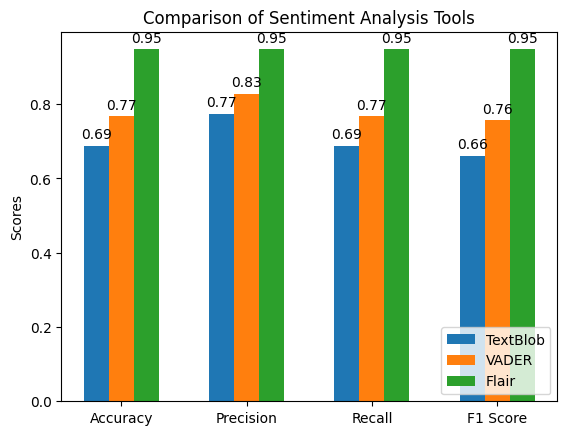

In [ ]:
import matplotlib.pyplot as plt

# Conver the results in lists
textblob_values = [accuracy_TextBlob, precision_TextBlob, recall_TextBlob, f1_TextBlob]
# textblobNB_values = [accuracy_TextBlob_NB, precision_TextBlob_NB, recall_TextBlob_NB, f1_TextBlob_NB]
vader_values = [accuracy_VADER, precision_VADER, recall_VADER, f1_VADER]
flair_values = [accuracy_flair, precision_flair, recall_flair, f1_flair]

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Setting the positions and width for the bars
x = range(len(labels))  # the label locations
width = 0.2  # the width of the bars

# Plotting
fig, ax = plt.subplots()
rects1 = ax.bar(x, textblob_values, width, label='TextBlob')
rects2 = ax.bar([p + width for p in x], vader_values, width, label='VADER')
rects3 = ax.bar([p + width * 2 for p in x], flair_values, width, label='Flair')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of Sentiment Analysis Tools')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

# Function to add labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Attach labels
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Show the plot
plt.show()


# Summary: TextBlob vs. VADER vs. Flair

In this tutorial, we compared TextBlob vs. VADER vs. Flair for sentiment analysis.

* Methodology
 * VADER and TextBlob are lexicon and rule-based.
 * Flair is model-based.
* Meaning of score
 * VADER and TextBlob have sentiment scores ranging from -1 to 1, where -1 means very negative, 1 means very positive, and 0 means neutral.
 * Flair has a score ranging from 0 to 1, where 0 means very unconfident about the prediction and 1 means very confident about the prediction.
* Speed Performance
 * Flair is slower than TextBlob and VADER because the computation algorithm is more complicated.
* Accuracy Performance
 * Based on the results of this project, flair has the best prediction accuracy, VADER is the second-best, and TextBlob is the third.


# References

* [Sentiment Labelled Sentences Data Set on UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)
* [TextBlob Documentation](https://textblob.readthedocs.io/en/dev/)
* [VADER Documentation](https://github.com/cjhutto/vaderSentiment)
* [Flair Documentation](https://github.com/flairNLP/flair)
* [Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)
